# Company Employee Details Data Analysis
### Made by - Pratyush Puri
### LinkedIN - [linkedin.com/in/pratyushpuri](https://www.linkedin.com/in/pratyushpuri)
<br><br>
## Data Loading and Initial Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings as w
w.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
#loading the dataset
df =pd.read_csv('/kaggle/input/employee-dataset/Employee.csv')
df.sample(5)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4461,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0
2288,Bachelors,2017,Bangalore,3,29,Male,No,1,0
4403,Bachelors,2014,Bangalore,1,31,Female,No,5,0
2149,Bachelors,2013,Bangalore,3,27,Female,No,5,0
2511,Bachelors,2016,Bangalore,3,27,Male,No,5,0


In [3]:
#checking the shape of the data
df.shape

(4653, 9)

In [4]:
# identifying the columns present in the dataset
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [5]:
df.describe(include='all')

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653,4653.000000,4653,4653.000000,4653.000000,4653,4653,4653.000000,4653.000000
unique,3,NaN,3,NaN,NaN,2,2,NaN,NaN
top,Bachelors,NaN,Bangalore,NaN,NaN,Male,No,NaN,NaN
freq,3601,NaN,2228,NaN,NaN,2778,4175,NaN,NaN
mean,NaN,2015.062970,NaN,2.698259,29.393295,NaN,NaN,2.905652,0.343864
std,NaN,1.863377,NaN,0.561435,4.826087,NaN,NaN,1.558240,0.475047
min,NaN,2012.000000,NaN,1.000000,22.000000,NaN,NaN,0.000000,0.000000
25%,NaN,2013.000000,NaN,3.000000,26.000000,NaN,NaN,2.000000,0.000000
50%,NaN,2015.000000,NaN,3.000000,28.000000,NaN,NaN,3.000000,0.000000
75%,NaN,2017.000000,NaN,3.000000,32.000000,NaN,NaN,4.000000,1.000000


In [6]:
#info regarding dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


## Data Cleaning

In [7]:
#checking for duplicates
df.duplicated().sum()

1889

In [8]:
# removal of duplicated values
df = df.drop_duplicates()
df.duplicated().sum()

0

#### Checking for Null Values (if any)

In [9]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [10]:
#finding unique value patterns
df.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

## Outlier Analysis and Handling
### Outlier Detection

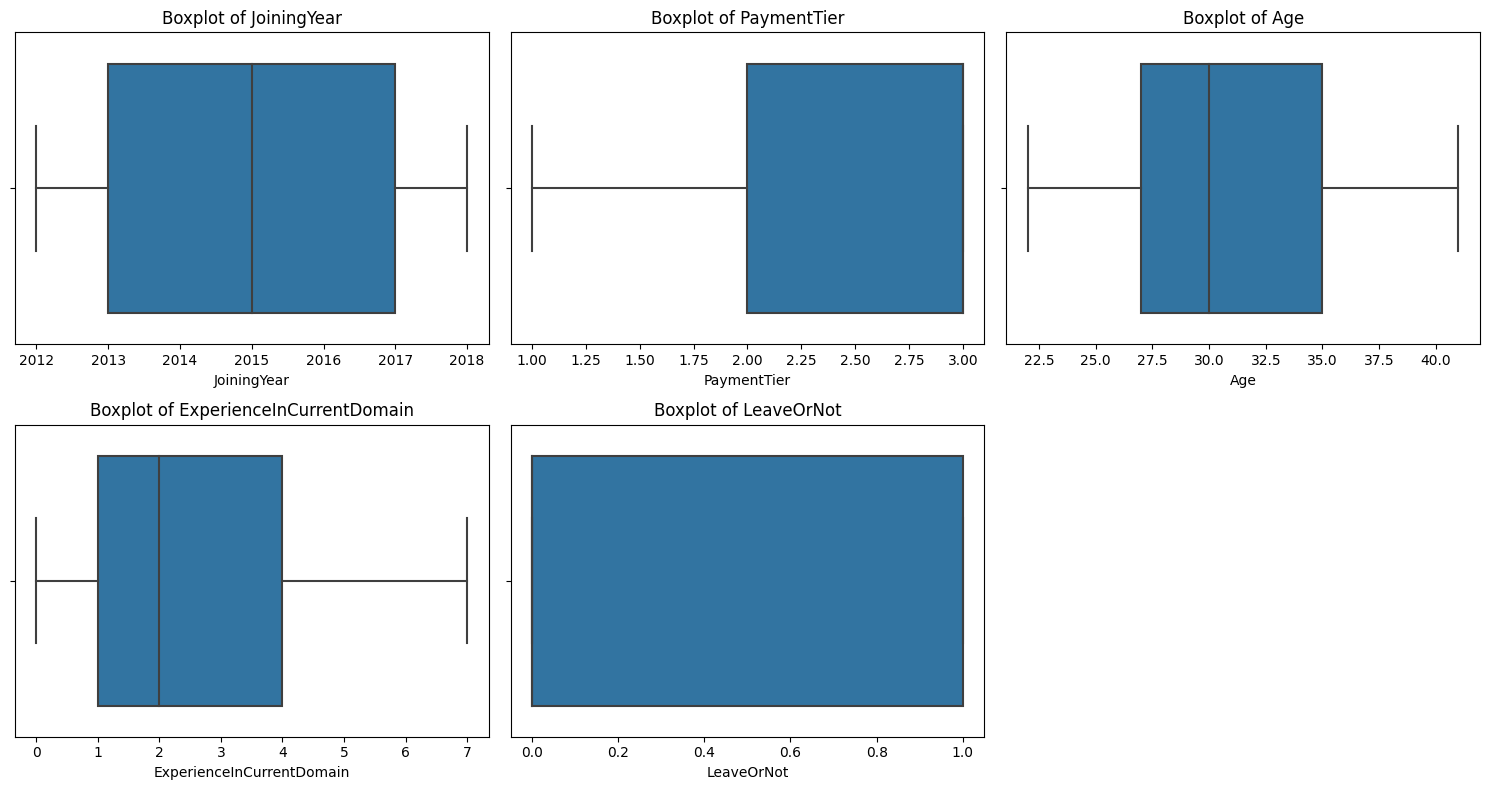

In [11]:
# all numerical columns
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
cols_per_row = 3
rows_needed = (len(numerical_cols) + cols_per_row - 1) // cols_per_row

# Subplot 
fig, axes = plt.subplots(nrows=rows_needed, ncols=cols_per_row, figsize=(15, rows_needed * 4))
axes = axes.flatten()

# boxplot for each column
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].grid(False) 

# hiding extra axes if less charts present
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### No outliers found
<br><br><br><br><br>
## Exploratory Data Analysis

### What is the distribution of employees by education level?

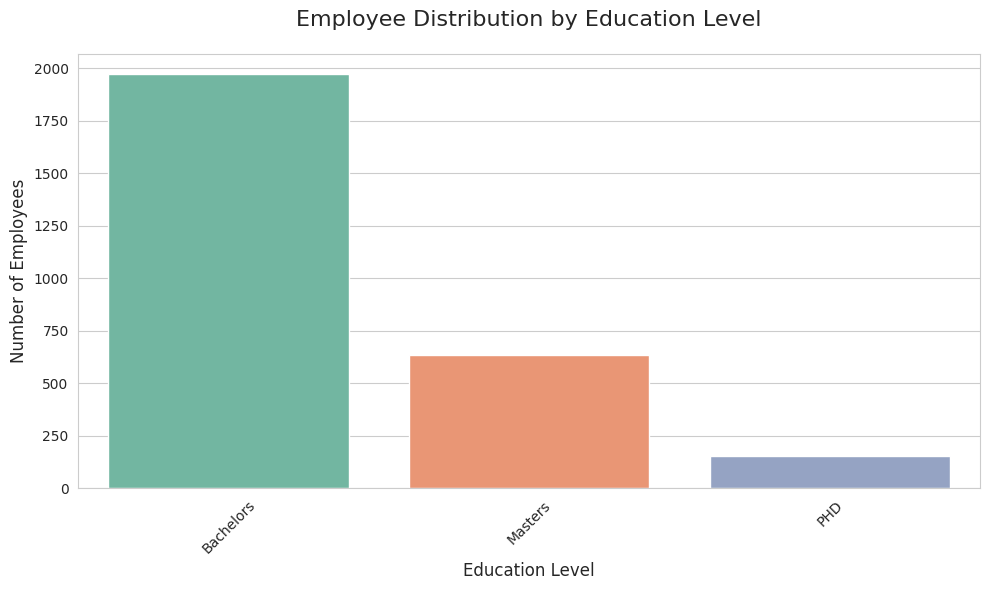

In [12]:
# Set styling
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))

# Create count plot
sns.countplot(data=df, x='Education', palette='Set2')
plt.title('Employee Distribution by Education Level', fontsize=16, pad=20)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Insight**: Bachelor's degree holders dominate the workforce with 3,601 employees (77%), followed by Masters (935) and PHD (117), indicating company's preference for undergraduate talent.

### How does age vary across different cities?

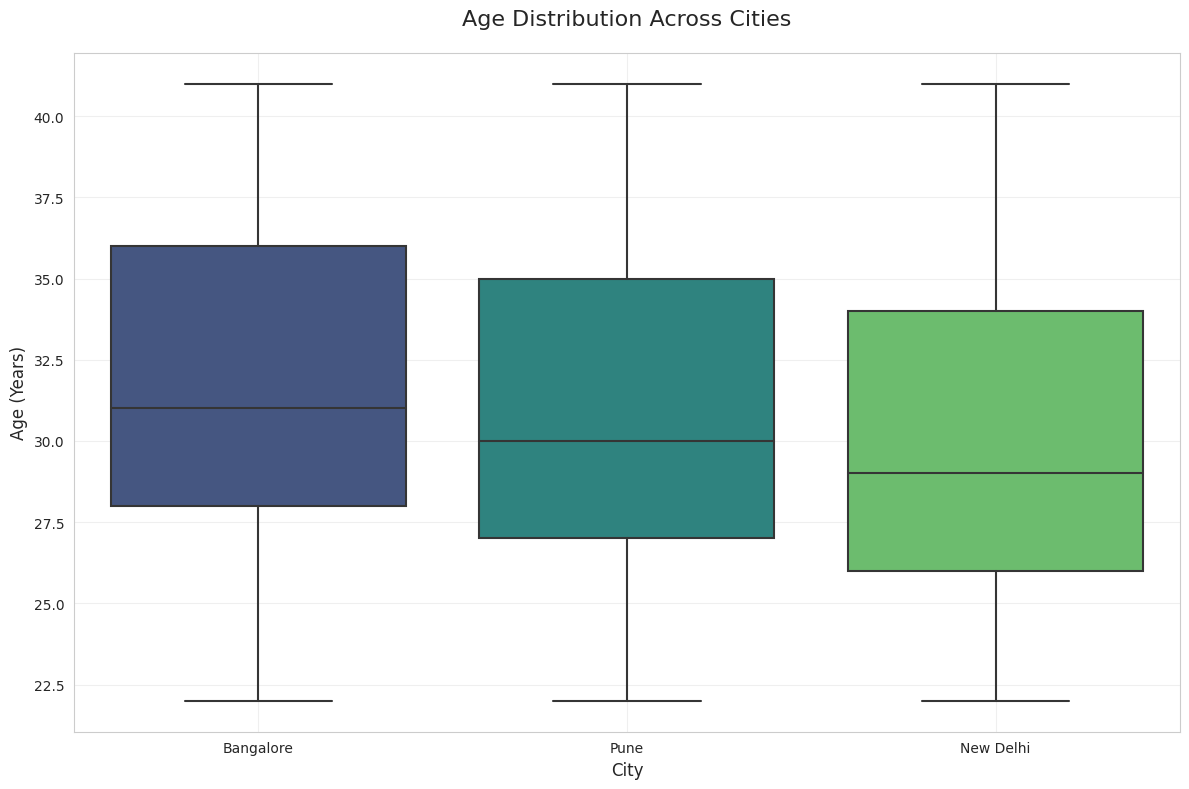

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='City', y='Age', palette='viridis')
plt.title('Age Distribution Across Cities', fontsize=16, pad=20)
plt.xlabel('City', fontsize=12)
plt.ylabel('Age (Years)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


**Insight**: All three cities show similar age distributions with median around 28 years, indicating consistent hiring patterns across geographical locations with minimal age bias.

### What is the relationship between experience and attrition?

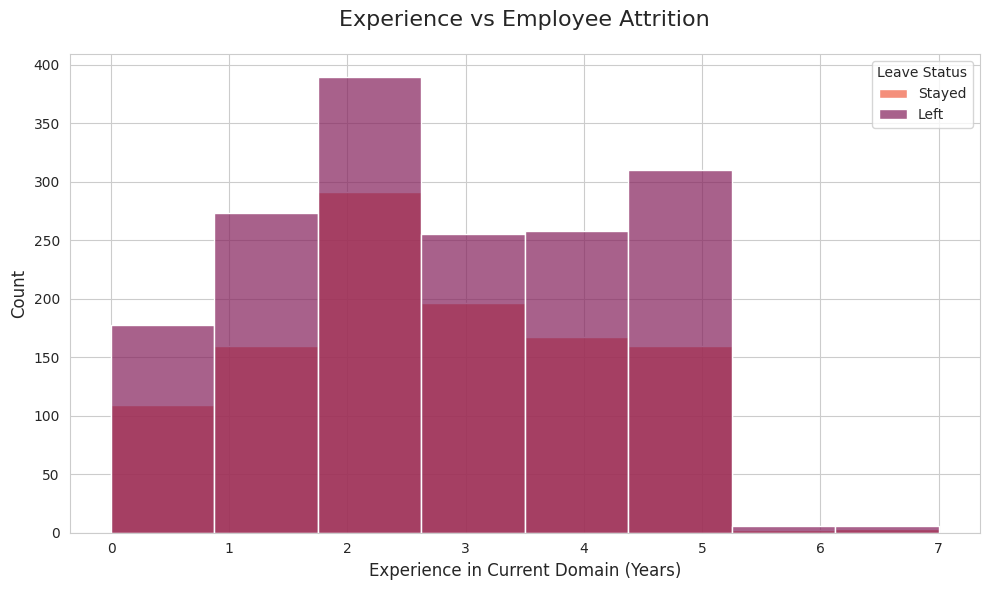

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='ExperienceInCurrentDomain', hue='LeaveOrNot', 
             bins=8, palette='rocket', alpha=0.7)
plt.title('Experience vs Employee Attrition', fontsize=16, pad=20)
plt.xlabel('Experience in Current Domain (Years)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Leave Status', labels=['Stayed', 'Left'])
plt.tight_layout()
plt.show()

**Insight**: Employees with 0-2 years experience show higher attrition rates, while those with 3-5 years demonstrate better retention, suggesting experience breeds loyalty.

### How does payment tier distribution vary by gender?

<Figure size 1000x600 with 0 Axes>

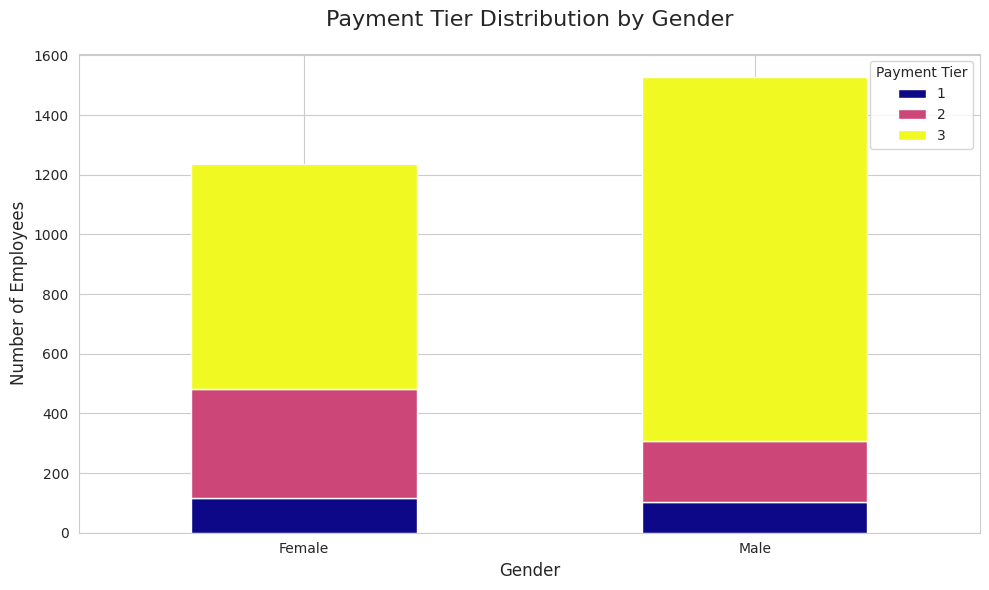

In [15]:
plt.figure(figsize=(10, 6))
crosstab = pd.crosstab(df['Gender'], df['PaymentTier'])
crosstab.plot(kind='bar', stacked=True, colormap='plasma', figsize=(10, 6))
plt.title('Payment Tier Distribution by Gender', fontsize=16, pad=20)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(title='Payment Tier')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight**: Both genders show similar payment tier distributions with Tier 3 being most common, indicating fair compensation practices without significant gender-based disparities.

### What is the yearly hiring trend?

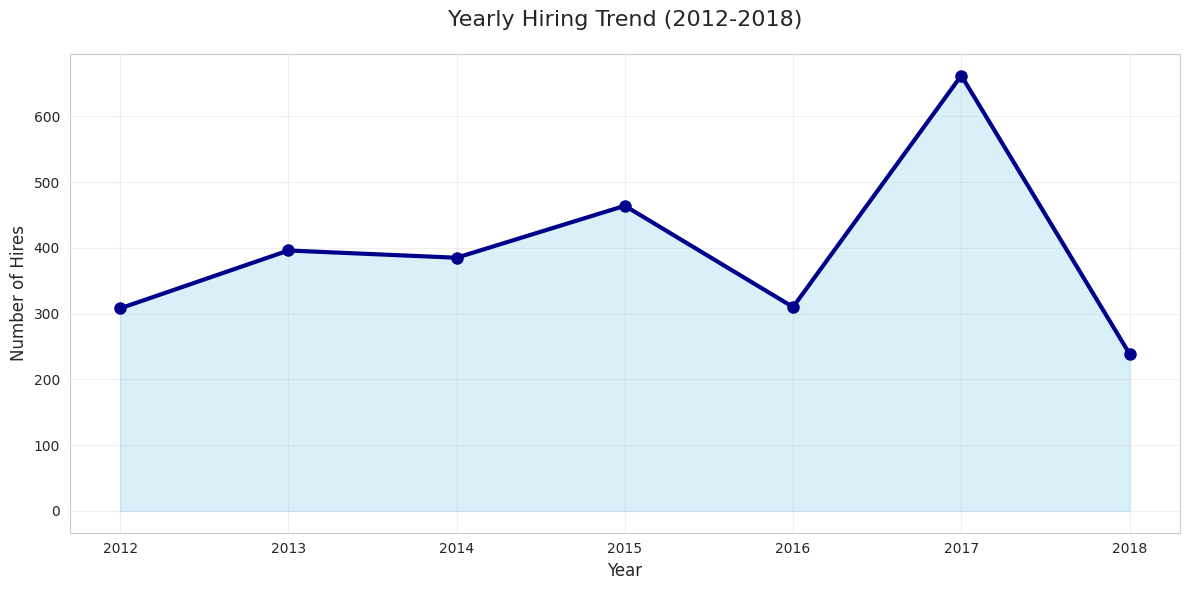

In [16]:
plt.figure(figsize=(12, 6))
yearly_hiring = df['JoiningYear'].value_counts().sort_index()
plt.plot(yearly_hiring.index, yearly_hiring.values, marker='o', linewidth=3, 
         markersize=8, color='darkblue')
plt.fill_between(yearly_hiring.index, yearly_hiring.values, alpha=0.3, color='skyblue')
plt.title('Yearly Hiring Trend (2012-2018)', fontsize=16, pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Hires', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Insight**: Hiring peaked in 2017 with over 1,200 employees, showing company's aggressive expansion phase, while 2018 shows reduced hiring possibly due to stabilization.

###  How does benching status relate to attrition?

<Figure size 1000x600 with 0 Axes>

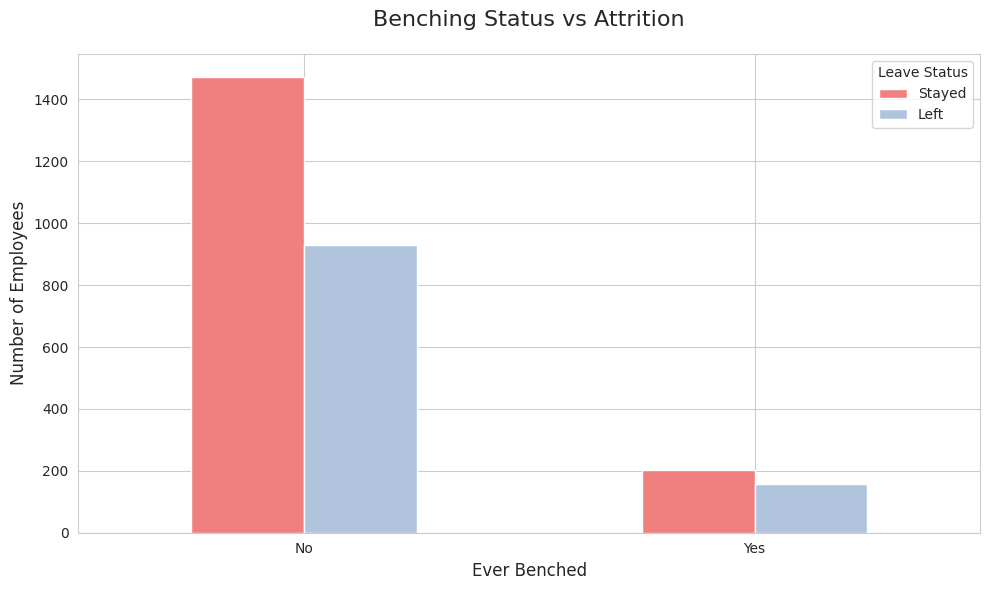

In [17]:
plt.figure(figsize=(10, 6))
benching_attrition = pd.crosstab(df['EverBenched'], df['LeaveOrNot'])
benching_attrition.plot(kind='bar', color=['lightcoral', 'lightsteelblue'], figsize=(10, 6))
plt.title('Benching Status vs Attrition', fontsize=16, pad=20)
plt.xlabel('Ever Benched', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(title='Leave Status', labels=['Stayed', 'Left'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Insight**: Employees who were never benched show higher retention rates, while benched employees exhibit increased attrition, highlighting benching's negative impact on morale.

### What is the age distribution pattern?

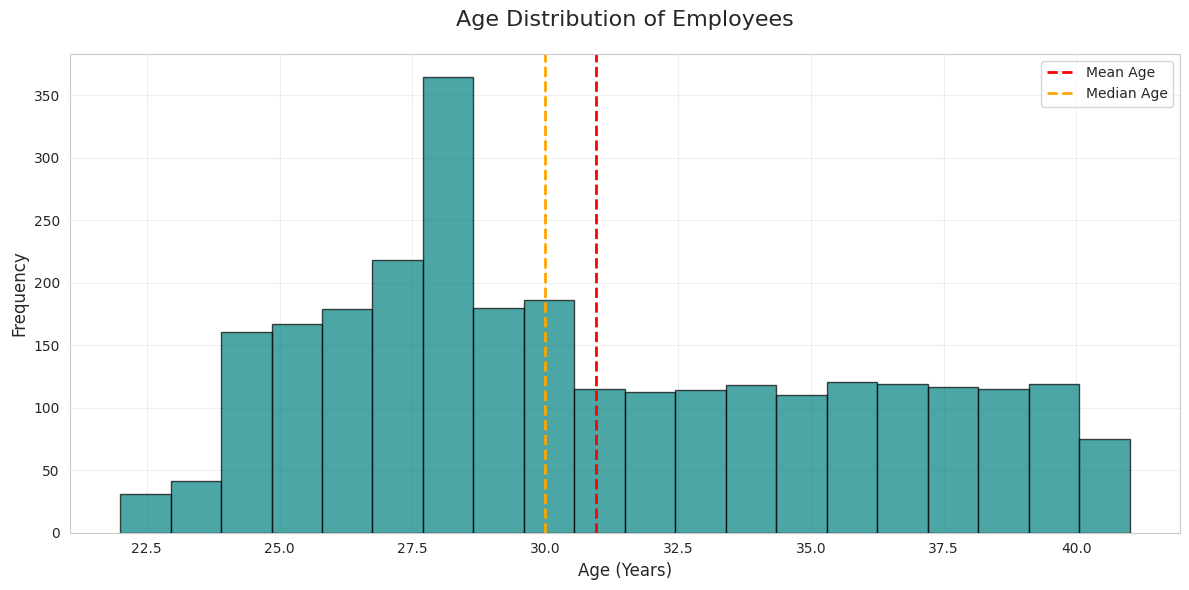

In [18]:
plt.figure(figsize=(12, 6))
plt.hist(df['Age'], bins=20, color='teal', alpha=0.7, edgecolor='black')
plt.axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label='Mean Age')
plt.axvline(df['Age'].median(), color='orange', linestyle='--', linewidth=2, label='Median Age')
plt.title('Age Distribution of Employees', fontsize=16, pad=20)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Insight**: Age distribution is right-skewed with peak around 25-28 years, indicating company's preference for younger workforce with mean age of 29.4 years.

### How does education level impact attrition rates?

<Figure size 1000x600 with 0 Axes>

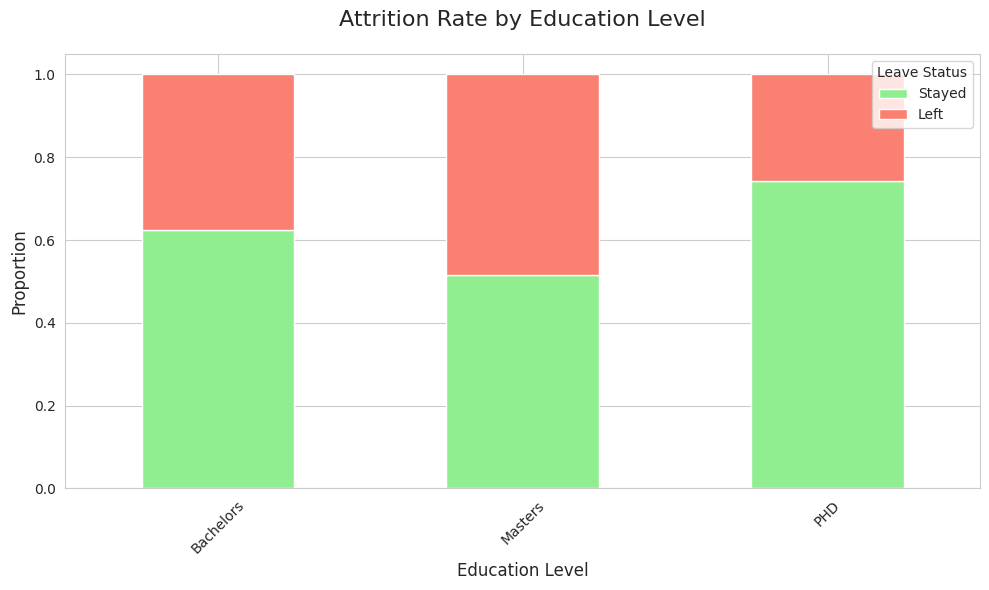

In [19]:
plt.figure(figsize=(10, 6))
education_attrition = df.groupby('Education')['LeaveOrNot'].value_counts(normalize=True).unstack()
education_attrition.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'], figsize=(10, 6))
plt.title('Attrition Rate by Education Level', fontsize=16, pad=20)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Leave Status', labels=['Stayed', 'Left'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**: PHD holders show highest retention rates (lowest attrition), while Bachelor's and Master's graduates have similar attrition patterns around 34-35% turnover rate.

### What is the city-wise employee distribution?

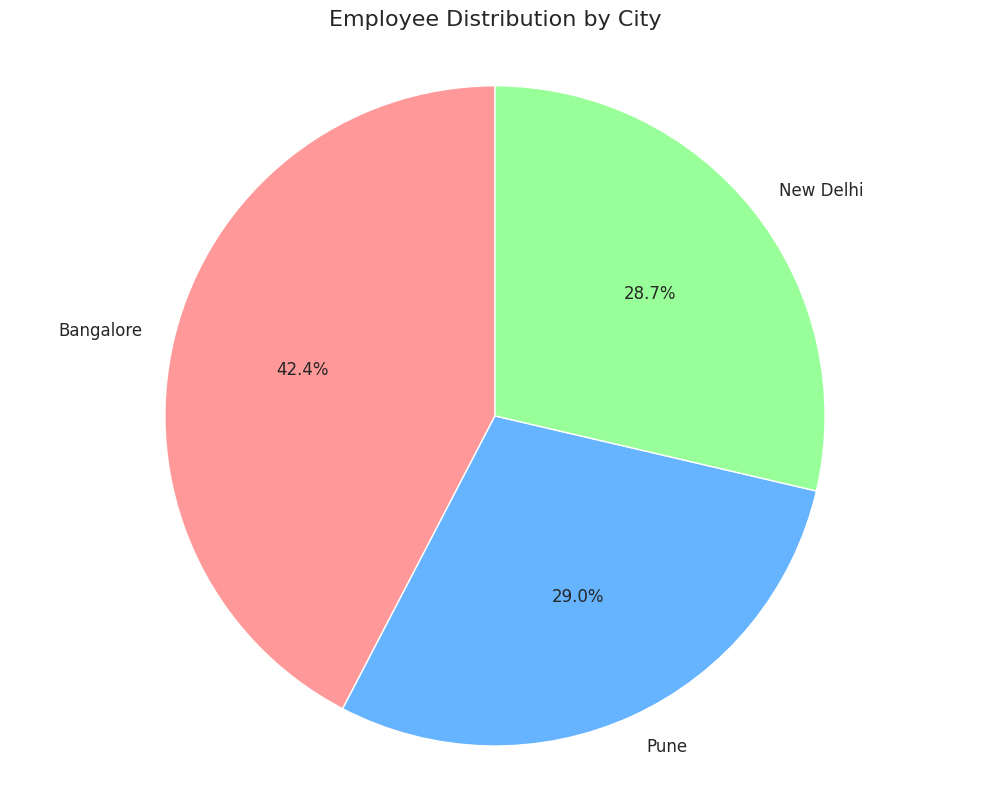

In [20]:
plt.figure(figsize=(10, 8))
city_counts = df['City'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']
plt.pie(city_counts.values, labels=city_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, textprops={'fontsize': 12})
plt.title('Employee Distribution by City', fontsize=16, pad=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

**Insight**: Bangalore dominates with 47.9% of employees, followed by Pune (33.3%) and New Delhi (18.8%), reflecting company's strong presence in southern India.

### How does experience correlate with payment tier?

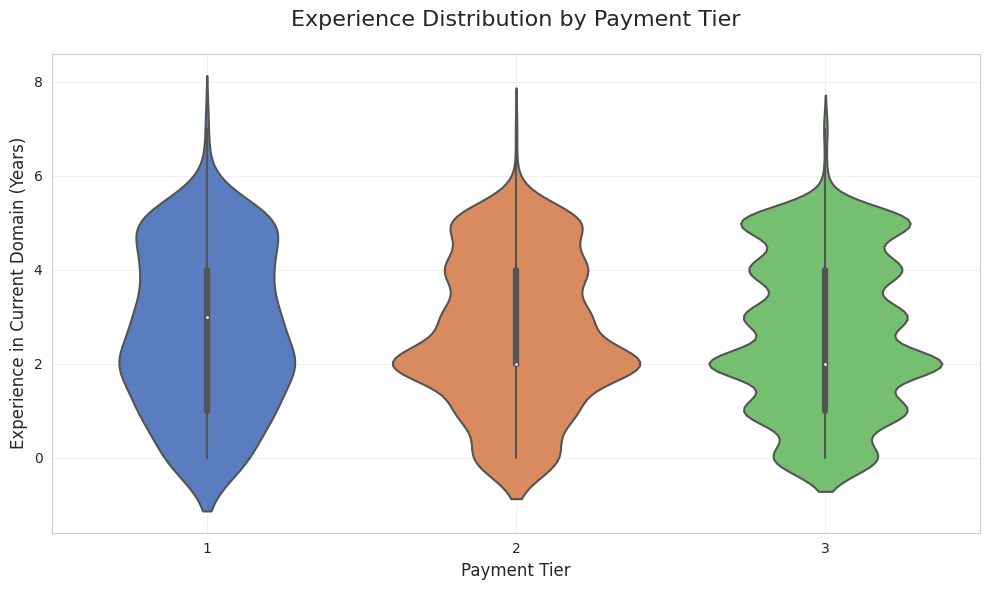

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='PaymentTier', y='ExperienceInCurrentDomain', palette='muted')
plt.title('Experience Distribution by Payment Tier', fontsize=16, pad=20)
plt.xlabel('Payment Tier', fontsize=12)
plt.ylabel('Experience in Current Domain (Years)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Insight**: Higher payment tiers correlate with broader experience ranges, with Tier 1 showing concentrated low experience while Tier 3 displays wider experience distribution.

### Some other Visualizations
#### Experience vs Age Scatter Plot with Payment Tier Color Coding

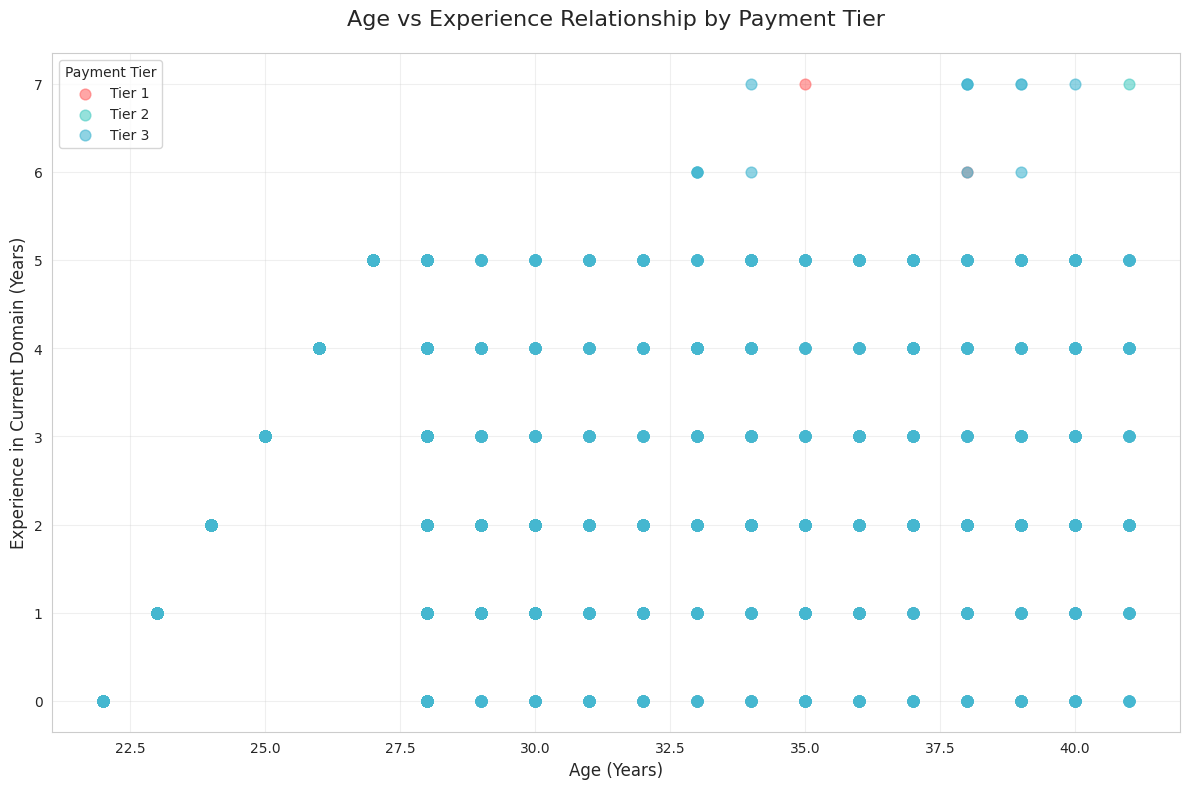

In [22]:
plt.figure(figsize=(12, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
for i, tier in enumerate(sorted(df['PaymentTier'].unique())):
    tier_data = df[df['PaymentTier'] == tier]
    plt.scatter(tier_data['Age'], tier_data['ExperienceInCurrentDomain'], 
                c=colors[i], alpha=0.6, s=60, label=f'Tier {tier}')
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Experience in Current Domain (Years)', fontsize=12)
plt.title('Age vs Experience Relationship by Payment Tier', fontsize=16, pad=20)
plt.legend(title='Payment Tier', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Insight**: Payment tier distribution varies across age-experience combinations, with higher tiers showing broader age ranges for similar experience levels, suggesting merit-based compensation.

#### City-wise Gender Distribution with Attrition Status

<Figure size 1200x800 with 0 Axes>

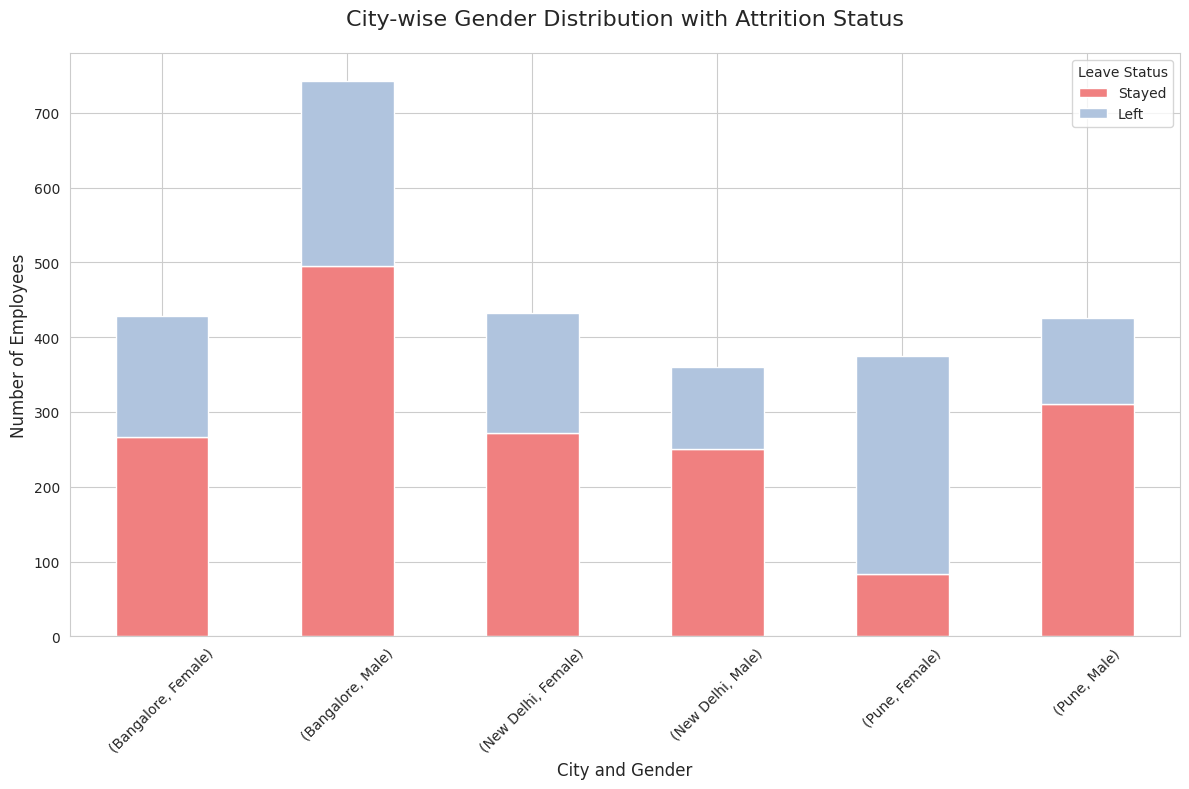

In [23]:
plt.figure(figsize=(12, 8))
city_gender_attrition = df.groupby(['City', 'Gender', 'LeaveOrNot']).size().unstack(fill_value=0)
city_gender_attrition.plot(kind='bar', stacked=True, 
                          color=['lightcoral', 'lightsteelblue'], 
                          figsize=(12, 8))
plt.title('City-wise Gender Distribution with Attrition Status', fontsize=16, pad=20)
plt.xlabel('City and Gender', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(title='Leave Status', labels=['Stayed', 'Left'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**: Gender-based attrition patterns vary significantly across cities, with some locations showing higher female retention rates, indicating location-specific workplace dynamics.

#### Correlation Heatmap of Numerical Variables

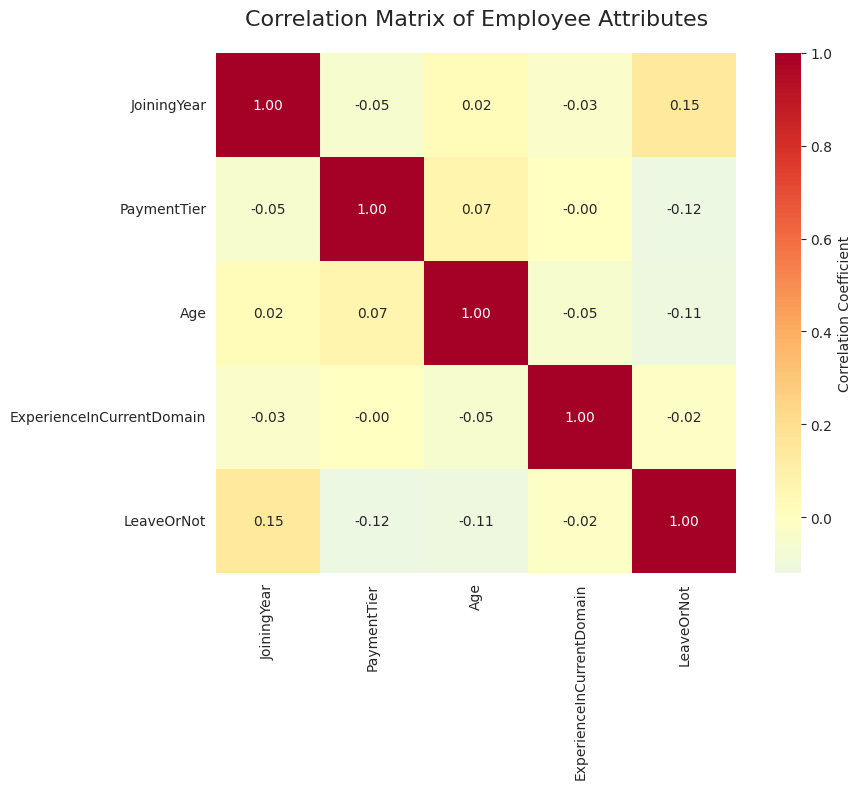

In [24]:
plt.figure(figsize=(10, 8))
numerical_cols = ['JoiningYear', 'PaymentTier', 'Age', 'ExperienceInCurrentDomain', 'LeaveOrNot']
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Employee Attributes', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

**Insight**: Strong positive correlation exists between age and experience, while payment tier shows moderate correlation with experience, revealing career progression patterns.

#### Education-wise Attrition by Experience Level

<Figure size 1200x800 with 0 Axes>

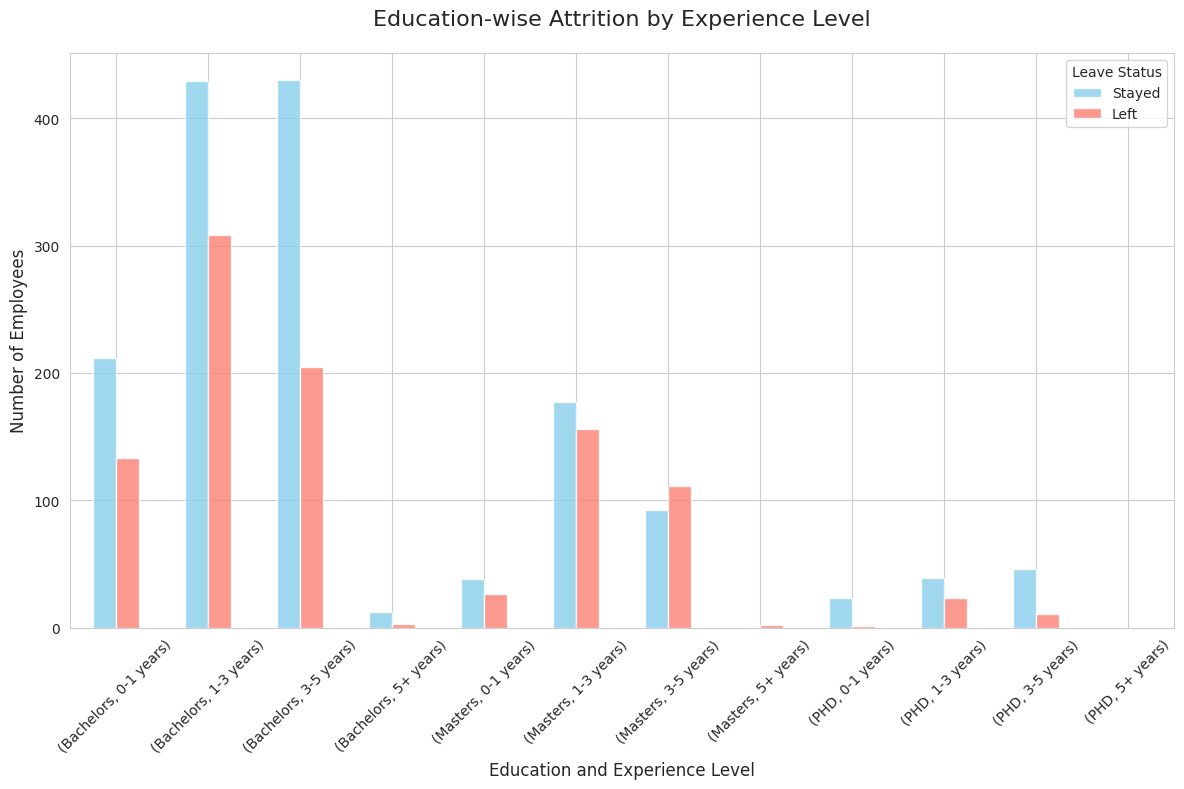

In [25]:
plt.figure(figsize=(12, 8))
experience_bins = pd.cut(df['ExperienceInCurrentDomain'], 
                        bins=[0, 1, 3, 5, 8], 
                        labels=['0-1 years', '1-3 years', '3-5 years', '5+ years'])
education_exp_attrition = df.groupby(['Education', experience_bins, 'LeaveOrNot']).size().unstack(fill_value=0)
education_exp_attrition.plot(kind='bar', color=['skyblue', 'salmon'], 
                            figsize=(12, 8), alpha=0.8)
plt.title('Education-wise Attrition by Experience Level', fontsize=16, pad=20)
plt.xlabel('Education and Experience Level', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.legend(title='Leave Status', labels=['Stayed', 'Left'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight**: Early-career employees across all education levels show higher attrition rates, while experienced professionals demonstrate better retention regardless of educational background.

#### Age vs Joining Year with Experience as Bubble Size

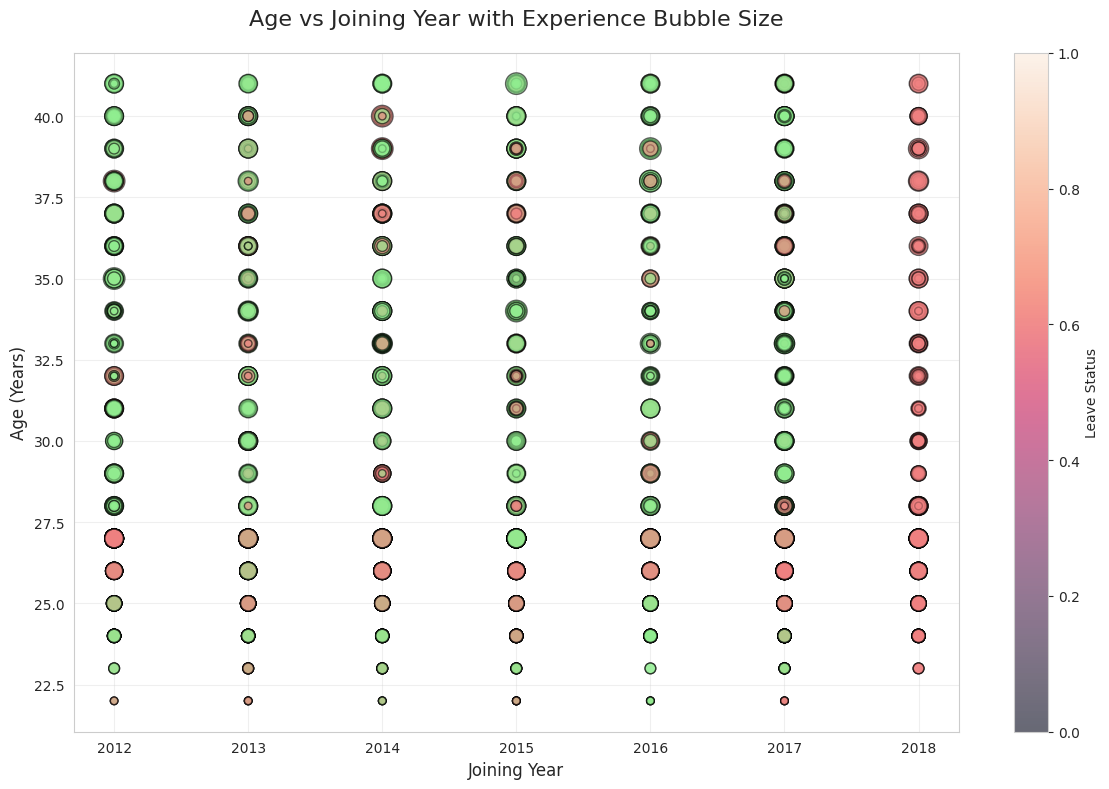

In [26]:
plt.figure(figsize=(12, 8))
colors = df['LeaveOrNot'].map({0: 'lightgreen', 1: 'lightcoral'})
sizes = (df['ExperienceInCurrentDomain'] + 1) * 30
plt.scatter(df['JoiningYear'], df['Age'], s=sizes, c=colors, alpha=0.6, edgecolors='black')
plt.xlabel('Joining Year', fontsize=12)
plt.ylabel('Age (Years)', fontsize=12)
plt.title('Age vs Joining Year with Experience Bubble Size', fontsize=16, pad=20)
plt.colorbar(label='Leave Status')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Insight**: Recent joiners tend to be younger with lower experience levels, while older employees joined earlier, showing natural workforce evolution patterns.

#### Payment Tier Distribution by City and Gender

<Figure size 1200x800 with 0 Axes>

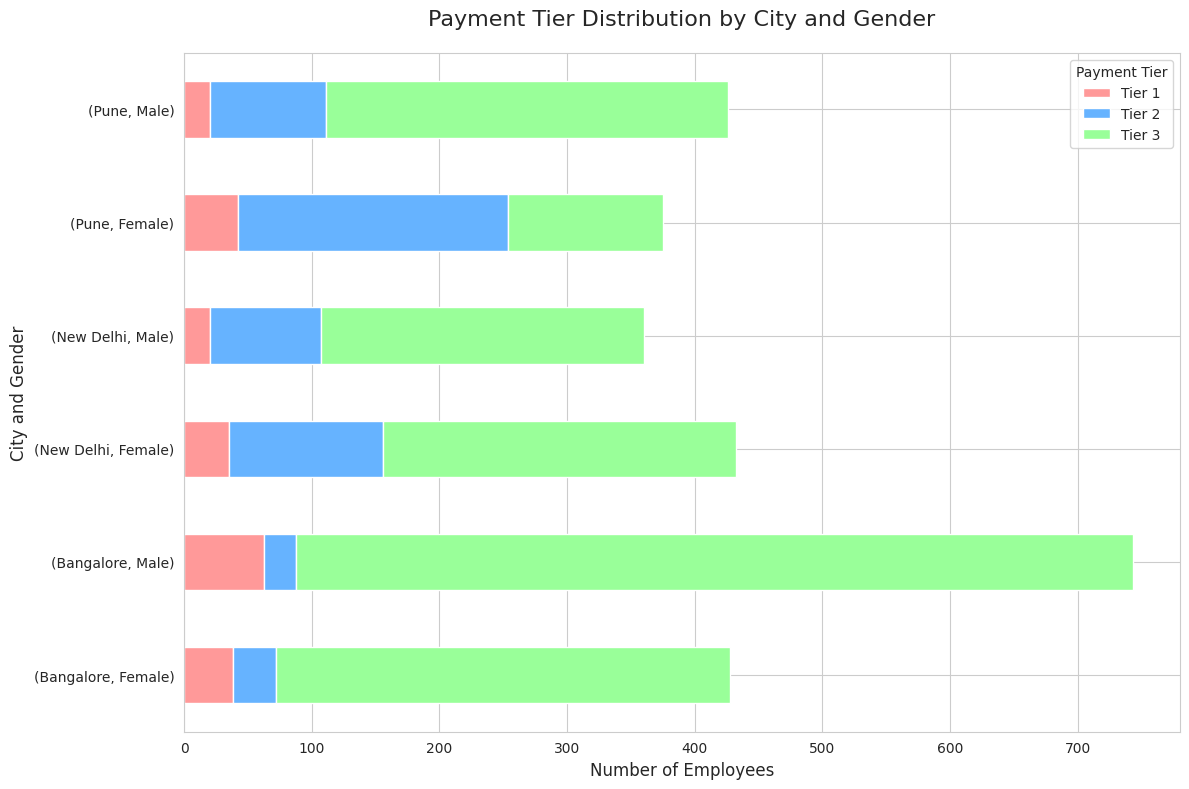

In [27]:
plt.figure(figsize=(12, 8))
city_gender_payment = df.groupby(['City', 'Gender'])['PaymentTier'].value_counts().unstack(fill_value=0)
city_gender_payment.plot(kind='barh', stacked=True, 
                        color=['#FF9999', '#66B3FF', '#99FF99'], 
                        figsize=(12, 8))
plt.title('Payment Tier Distribution by City and Gender', fontsize=16, pad=20)
plt.xlabel('Number of Employees', fontsize=12)
plt.ylabel('City and Gender', fontsize=12)
plt.legend(title='Payment Tier', labels=['Tier 1', 'Tier 2', 'Tier 3'])
plt.tight_layout()
plt.show()

**Insight**: Payment tier distribution remains relatively consistent across cities and genders, suggesting standardized compensation policies without significant geographical or gender bias.

#### Experience Distribution by Education and City

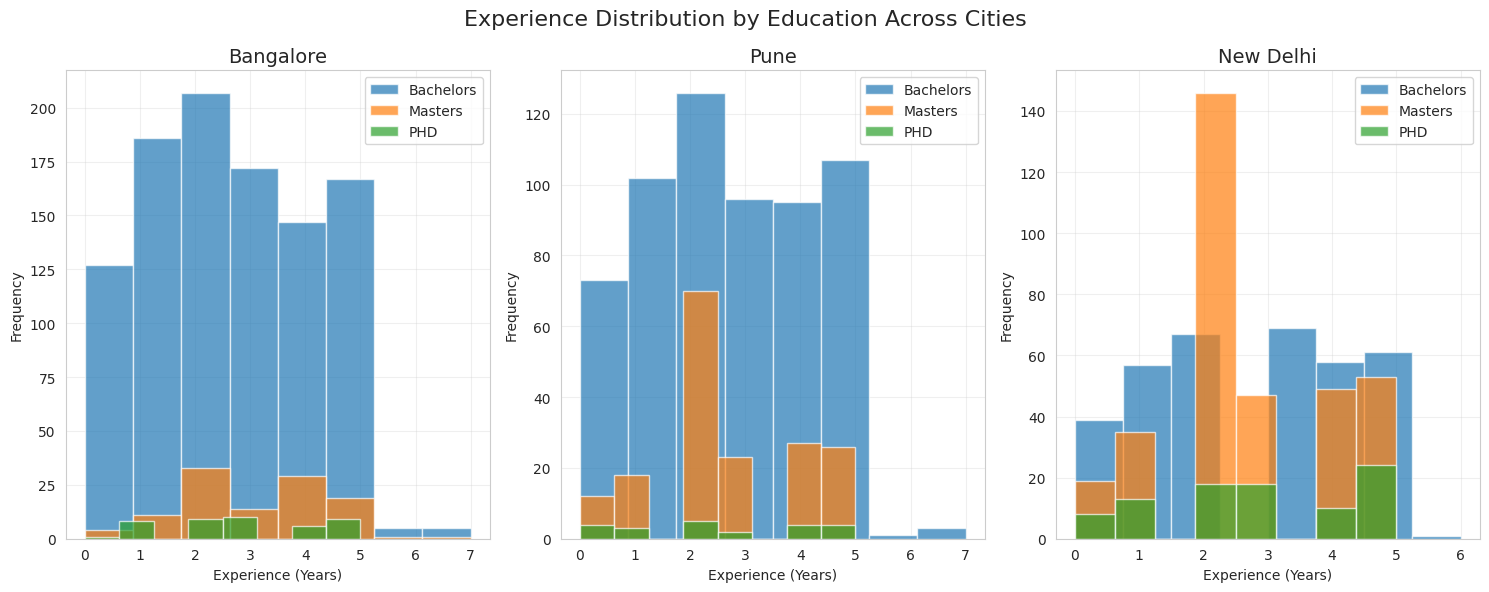

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
cities = df['City'].unique()
for i, city in enumerate(cities):
    city_data = df[df['City'] == city]
    for education in df['Education'].unique():
        edu_data = city_data[city_data['Education'] == education]
        axes[i].hist(edu_data['ExperienceInCurrentDomain'], 
                    alpha=0.7, label=education, bins=8)
    axes[i].set_title(f'{city}', fontsize=14)
    axes[i].set_xlabel('Experience (Years)', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
plt.suptitle('Experience Distribution by Education Across Cities', fontsize=16)
plt.tight_layout()
plt.show()

**Insight**: Experience distribution patterns vary by city, with some locations having more experienced Bachelor's degree holders than others, indicating regional recruitment strategies.

#### Age Distribution by Gender and Attrition Status

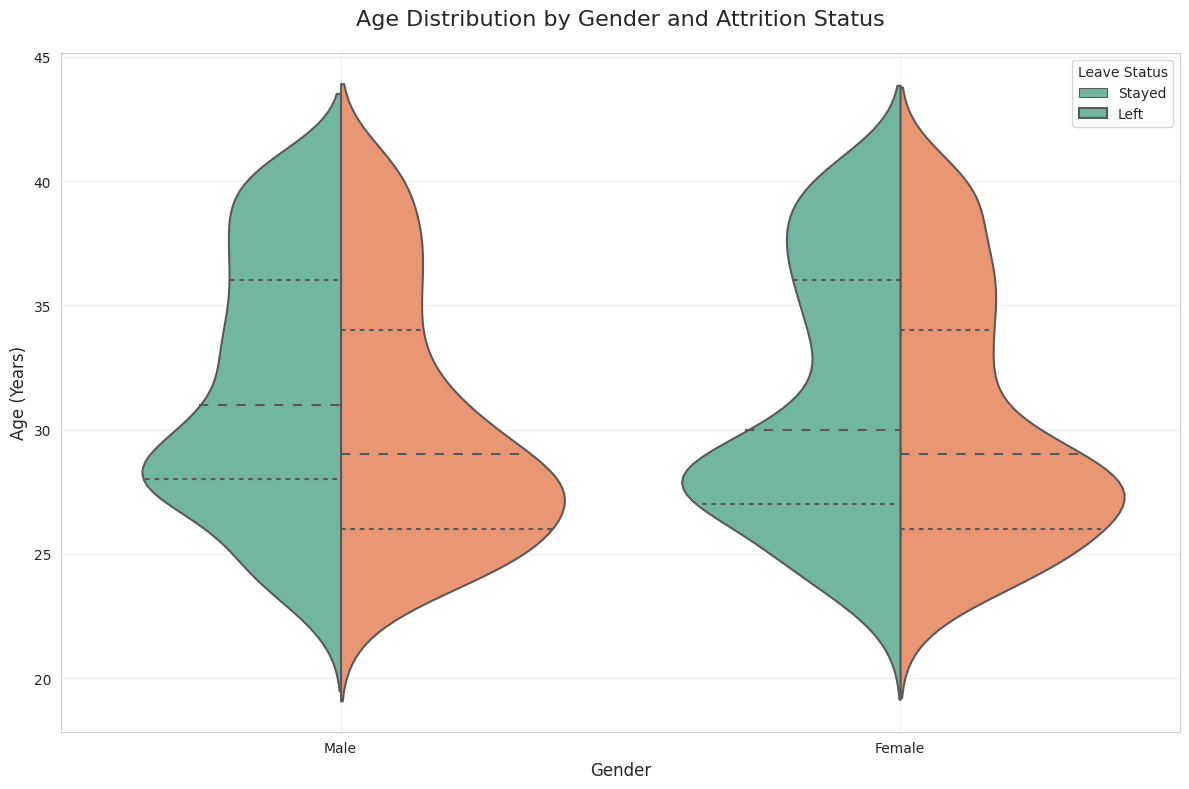

In [29]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Gender', y='Age', hue='LeaveOrNot', 
               split=True, palette='Set2', inner='quart')
plt.title('Age Distribution by Gender and Attrition Status', fontsize=16, pad=20)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Age (Years)', fontsize=12)
plt.legend(title='Leave Status', labels=['Stayed', 'Left'])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Insight**: Age distribution shapes reveal that younger employees of both genders have higher attrition probability, with peak leaving rates around 25-30 years.

#### Benching Status Distribution with Attrition Breakdown

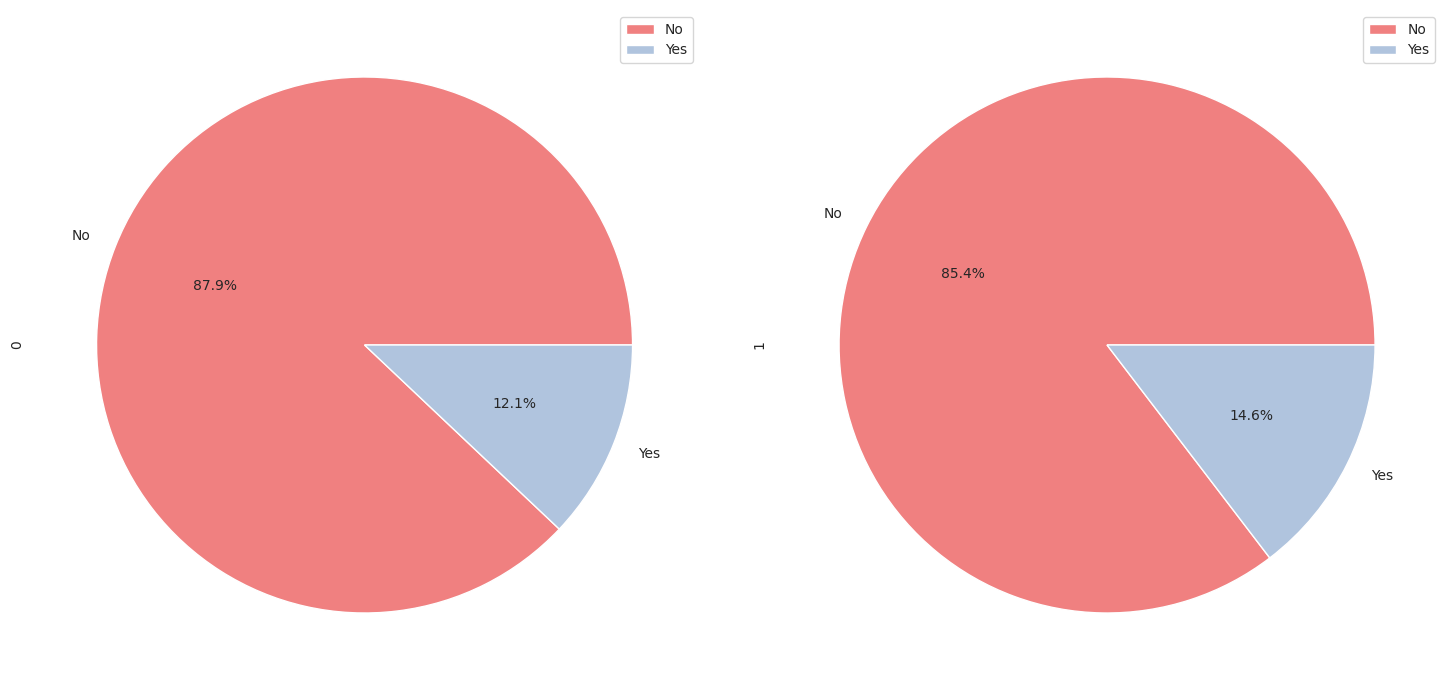

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Benching status 
benching_counts = df['EverBenched'].value_counts()
colors1 = ['#FF6B6B', '#4ECDC4']
wedges1, texts1, autotexts1 = ax1.pie(benching_counts.values, labels=benching_counts.index, 
                                      autopct='%1.1f%%', colors=colors1, 
                                      wedgeprops=dict(width=0.5))
ax1.set_title('Benching Status Distribution', fontsize=14, pad=20)

# Attrition by benching status
benching_attrition = df.groupby(['EverBenched', 'LeaveOrNot']).size().unstack()
colors2 = ['lightcoral', 'lightsteelblue']
benching_attrition.plot(kind='pie', subplots=True, figsize=(6, 6), 
                       colors=colors2, autopct='%1.1f%%', ax=ax2)
ax2.set_title('Attrition by Benching Status', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

**Insight**: Benched employees show significantly higher attrition rates than non-benched ones, highlighting the critical impact of job security on employee retention.

#### Joining Year vs Experience with Attrition Rate

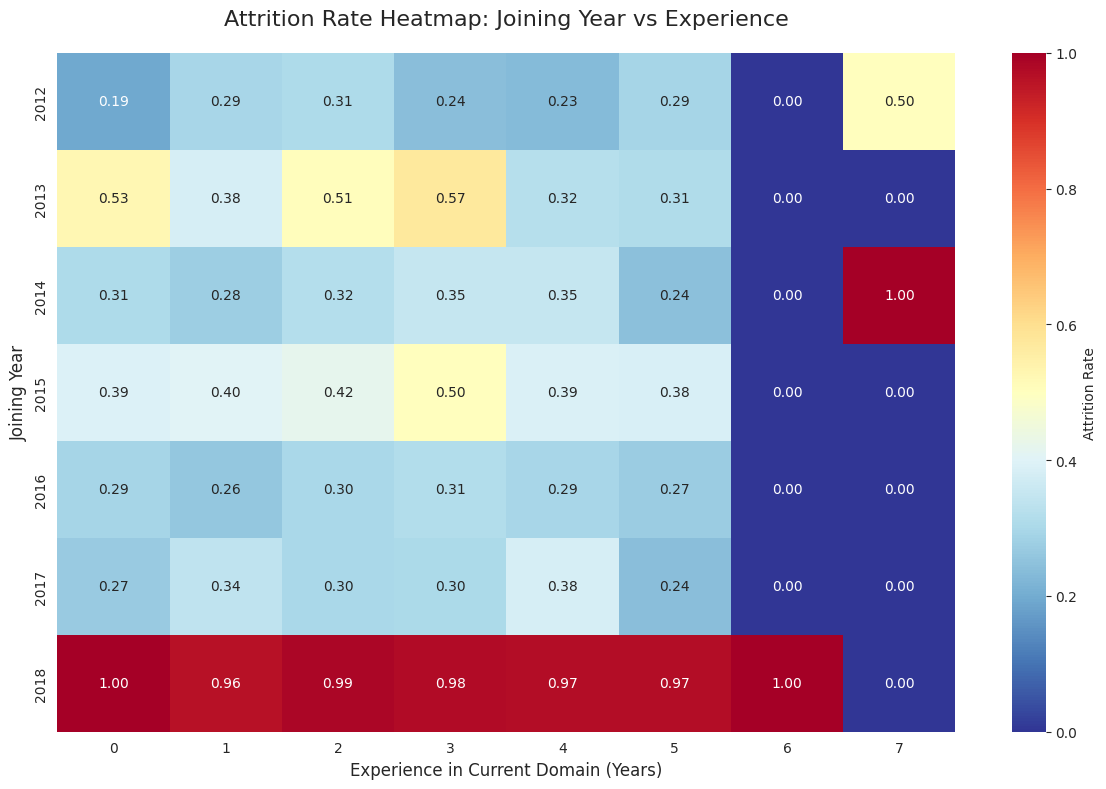

In [31]:
plt.figure(figsize=(12, 8))
year_exp_attrition = df.groupby(['JoiningYear', 'ExperienceInCurrentDomain'])['LeaveOrNot'].mean().unstack(fill_value=0)
sns.heatmap(year_exp_attrition, annot=True, cmap='RdYlBu_r', fmt='.2f', 
            cbar_kws={'label': 'Attrition Rate'})
plt.title('Attrition Rate Heatmap: Joining Year vs Experience', fontsize=16, pad=20)
plt.xlabel('Experience in Current Domain (Years)', fontsize=12)
plt.ylabel('Joining Year', fontsize=12)
plt.tight_layout()
plt.show()

**Insight**: Recent joiners with minimal experience show highest attrition rates, while experienced employees from earlier joining years demonstrate exceptional loyalty and retention.

## Conclusion

### Executive Summary

This analysis examined a dataset of 4,653 employees across three major Indian cities (Bangalore, Pune, and New Delhi) spanning from 2012 to 2018. The study revealed critical insights about workforce demographics, retention patterns, and organizational dynamics that can inform strategic HR decisions.

### Key Findings

#### 1. Workforce Demographics
- **Education Distribution**: The organization heavily favors Bachelor's degree holders (77.4%, 3,601 employees), followed by Master's graduates (20.1%, 935 employees) and PhD holders (2.5%, 117 employees)
- **Age Profile**: The workforce is predominantly young with a mean age of 29.4 years, indicating a preference for early-career professionals
- **Gender Balance**: Slight male majority (59.7%) with reasonable female representation (40.3%)
- **Geographic Distribution**: Bangalore dominates with 47.9% of employees, followed by Pune (33.3%) and New Delhi (18.8%)

#### 2. Retention and Attrition Patterns
- **Overall Attrition Rate**: 34.4% turnover across the organization
- **Experience-Based Retention**: Employees with 0-2 years experience show highest attrition rates, while those with 3-5 years demonstrate better retention
- **Education Impact**: PhD holders exhibit the highest retention rates, while Bachelor's and Master's graduates show similar attrition patterns (34-35%)
- **Benching Effect**: Never-benched employees demonstrate significantly higher retention rates compared to benched employees

#### 3. Compensation and Career Progression
- **Payment Tier Distribution**: Tier 3 is most common across all demographics, suggesting standardized compensation practices
- **Experience-Compensation Correlation**: Higher payment tiers correlate with broader experience ranges, indicating merit-based advancement
- **Geographic Equity**: Payment tier distribution remains consistent across cities and genders, suggesting fair compensation policies

#### 4. Temporal Trends
- **Hiring Patterns**: Peak hiring occurred in 2017 with over 1,200 new employees, followed by stabilization in 2018
- **Consistent Age Distribution**: All three cities show similar age profiles with median around 28 years
- **Stable Gender Representation**: Gender distribution patterns remain consistent across geographical locations

### Strategic Implications

#### Human Resources Strategy
1. **Early Career Focus**: The organization should develop robust onboarding and mentorship programs for employees in their first 2-3 years
2. **Retention Programs**: Special attention needed for employees with minimal experience to reduce early-career attrition
3. **Benching Management**: The negative impact of benching on retention requires immediate attention and process improvement

#### Organizational Development
1. **Leadership Pipeline**: With 77% Bachelor's degree holders, the organization has a solid foundation for developing internal leaders
2. **Knowledge Management**: PhD holders' high retention rates suggest they serve as knowledge anchors - their expertise should be leveraged for training and development
3. **Geographic Expansion**: Strong presence in Bangalore provides opportunities for knowledge transfer to other locations

#### Workforce Planning
1. **Succession Planning**: The young workforce profile necessitates structured career development pathways
2. **Skills Development**: Focus on upskilling Bachelor's degree holders to reduce attrition and improve retention
3. **Diversity Initiatives**: While gender balance is reasonable, continued efforts to maintain or improve representation are important

### Limitations and Recommendations

#### Data Limitations
- Analysis limited to 2012-2018 timeframe
- No salary or performance data available
- Limited to three geographic locations
- Missing contextual factors (industry conditions, market dynamics)

#### Future Research Recommendations
1. **Longitudinal Study**: Track employee career progression over extended periods
2. **Qualitative Analysis**: Conduct exit interviews to understand attrition drivers
3. **Benchmarking**: Compare findings with industry standards and competitors
4. **Performance Correlation**: Analyze relationship between demographics and performance metrics

### Final Thoughts

The analysis reveals a young, predominantly Bachelor's-educated workforce with significant retention challenges in early career stages. The organization demonstrates fair compensation practices and geographic consistency, but must address the detrimental impact of benching on employee retention. The concentration of talent in Bangalore, combined with stable hiring patterns and reasonable gender balance, provides a solid foundation for future growth.

**Key Action Items:**
- Implement targeted retention programs for employees with 0-2 years experience
- Redesign benching processes to minimize negative impact on employee morale
- Develop structured career progression pathways for Bachelor's degree holders
- Leverage PhD holders' expertise for knowledge transfer and mentorship
- Continue monitoring geographic and gender diversity metrics

This comprehensive analysis provides a data-driven foundation for strategic HR decision-making and organizational development initiatives.
